# Comparing original dataset to reweighted using KL Divergence

Toy example used to show how the metric of KL Divergence can be used to gauge the likeness of the original dataset to the reweighted one.

In [115]:
import numpy as np
import pandas as pd
from emm.losses import *
from emm.regularizers import *
from emm.solvers import *
from emm import emm

# Generate example data
m = 10000
mu0 = np.array([100, 10]); sig0 = np.array([10  , 1   ])
mu1 = np.array([150, 15]); sig1 = np.array([12.5, 1.25])


mu = np.array([125,12.5]); sig = np.array([20,5])
corpus = np.random.normal(loc=mu, scale=sig, size=(m,2))
X0 = np.random.normal(loc=mu0, scale=sig0, size=(m // 2, 2))
X1 = np.random.normal(loc=mu1, scale=sig1, size=(m // 2, 2))

y0 = np.zeros(m // 2)
y1 = np.ones(m // 2)

X = np.concatenate([X0,X1])
y = np.concatenate([y0,y1])
df = pd.DataFrame(X)
df['Outcome'] = y

corpus = pd.DataFrame(corpus)
marginals = {0 : ["mean", "std"], 1 : ["mean", "std"]}
loss_0 = [KLLoss(mu0), EqualityLoss(sig0)]
loss_1 = [EqualityLoss(mu1), EqualityLoss(sig1)]

regularizer = EntropyRegularizer()
w_0, out_0 = emm(corpus, marginals, loss_0, regularizer, lam=1, optimizer='admm')
w_1, out_1 = emm(corpus, marginals, loss_1, regularizer, lam=1, optimizer='admm')

w_X = np.concatenate([corpus,corpus]) 
w = np.concatenate([w_0, w_1])
w_label = np.concatenate([np.zeros(m), np.ones(m)])

w_df = pd.DataFrame(w_X)
w_df["weights"] = w
w_df["Outcome"] = w_label
print(out_0)
print(out_1)

[array([55.11492369]), array([55.11492369]), array([55.11492369]), array([55.11492369])]
[array([125.13406475]), array([125.13406475])]


<ipython-input-100-7d9e96806d32>:5: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  H, bins = np.histogram(np.array(w_df[w_df["Outcome"]==0][0]), bins = 50,
<ipython-input-100-7d9e96806d32>:8: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  H, bins = np.histogram(np.array(df[df["Outcome"]==0][0]),normed=True)


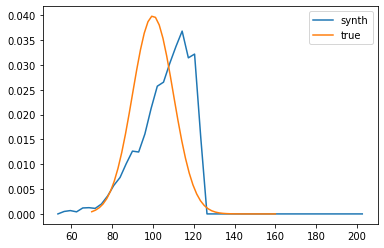

In [100]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

H, bins = np.histogram(np.array(w_df[w_df["Outcome"]==0][0]), bins = 50,
                       weights = np.array(w_df[w_df["Outcome"]==0]["weights"]), normed = True)
plt.plot(bins[:-1],H, label='synth')
H, bins = np.histogram(np.array(df[df["Outcome"]==0][0]),normed=True)
x = np.linspace(70,160)
plt.plot(x,norm.pdf(x,loc=mu0[0],scale=sig0[0]), label = "true")
plt.legend()
plt.show()

<ipython-input-101-4791bc6c2c79>:1: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  H, bins = np.histogram(np.array(w_df[w_df["Outcome"]==0][1]), bins = 25,
<ipython-input-101-4791bc6c2c79>:4: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  H, bins = np.histogram(np.array(df[df["Outcome"]==0][1]),normed=True)


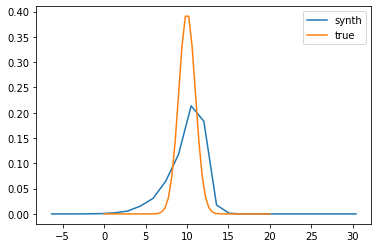

In [101]:
H, bins = np.histogram(np.array(w_df[w_df["Outcome"]==0][1]), bins = 25,
                       weights = np.array(w_df[w_df["Outcome"]==0]["weights"]), normed = True)
plt.plot(bins[:-1],H, label='synth')
H, bins = np.histogram(np.array(df[df["Outcome"]==0][1]),normed=True)
x = np.linspace(0,20)
plt.plot(x,norm.pdf(x,loc=mu0[1],scale=sig0[1]), label = "true")
plt.legend()
plt.show()

<ipython-input-102-23f432179ee1>:1: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  H, bins = np.histogram(np.array(w_df[w_df["Outcome"]==1][0]), bins = 15,
<ipython-input-102-23f432179ee1>:4: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  H, bins = np.histogram(np.array(df[df["Outcome"]==1][0]),normed=True)


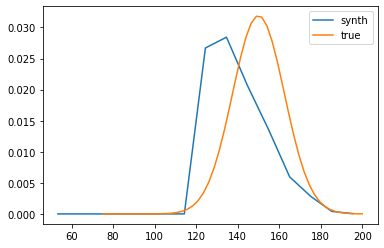

In [102]:
H, bins = np.histogram(np.array(w_df[w_df["Outcome"]==1][0]), bins = 15,
                       weights = np.array(w_df[w_df["Outcome"]==1]["weights"]), normed = True)
plt.plot(bins[:-1],H, label='synth')
H, bins = np.histogram(np.array(df[df["Outcome"]==1][0]),normed=True)
x = np.linspace(75,200)
plt.plot(x,norm.pdf(x,loc=mu1[0],scale=sig1[0]), label = "true")
plt.legend()
plt.show()

<ipython-input-103-07be442163b5>:1: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  H, bins = np.histogram(np.array(w_df[w_df["Outcome"]==1][1]), bins = 15,
<ipython-input-103-07be442163b5>:4: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  H, bins = np.histogram(np.array(df[df["Outcome"]==1][1]),normed=True)


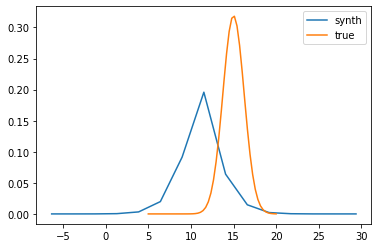

In [103]:
H, bins = np.histogram(np.array(w_df[w_df["Outcome"]==1][1]), bins = 15,
                       weights = np.array(w_df[w_df["Outcome"]==1]["weights"]), normed = True)
plt.plot(bins[:-1],H, label='synth')
H, bins = np.histogram(np.array(df[df["Outcome"]==1][1]),normed=True)
x = np.linspace(5,20)
plt.plot(x,norm.pdf(x,loc=mu1[1],scale=sig1[1]), label = "true")
plt.legend()
plt.show()

In [104]:
h, e = np.histogramdd(np.array(w_df[w_df["Outcome"]==0][[0,1]]), bins = 10)

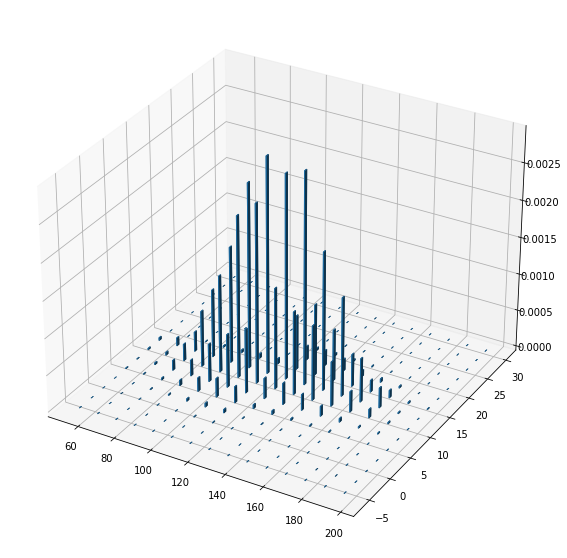

In [105]:
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
hist, e = np.histogramdd(np.array(w_df[[0,1]]), bins = 15, 
                         weights = w_df["weights"], normed = True)
xedges = e[0]
yedges = e[1]
# Construct arrays for the anchor positions of the 16 bars.
xwidth = xedges[:-1] + 0.25
ywidth = yedges[:-1] + 0.25

xpos, ypos = np.meshgrid(xwidth,ywidth, indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = 0

# Construct arrays with the dimensions for the 16 bars.
dx = dy = 0.5 * np.ones_like(zpos)
dz = hist.ravel()

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average')

xlim = ax.get_xlim
ylim = ax.get_ylim

plt.show()

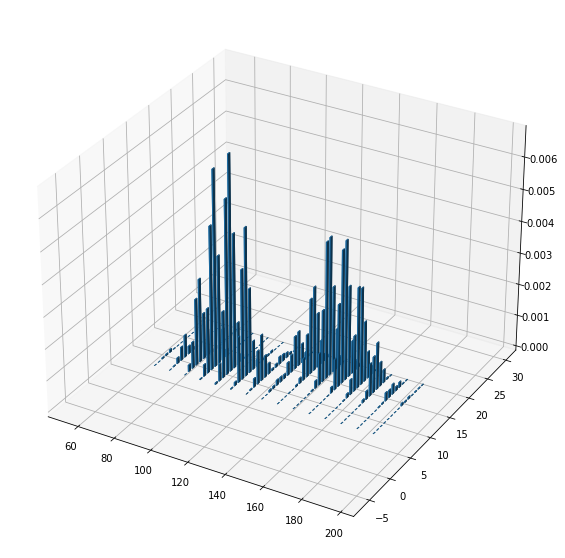

In [106]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
hist, e = np.histogramdd(np.array(df[[0,1]]), bins = 15,
                        normed = True)
xedges = e[0]
yedges = e[1]

xwidth = xedges[:-1] + 0.25
ywidth = yedges[:-1] + 0.25
# Construct arrays for the anchor positions of the 16 bars.
xpos, ypos = np.meshgrid(xwidth,ywidth, indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = 0

# Construct arrays with the dimensions for the 16 bars.
dx = dy = 0.5 * np.ones_like(zpos)
dz = hist.ravel()

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average')
ax.set_xlim(xlim())
ax.set_ylim(ylim())
plt.show()

In [64]:
df[df["Outcome"]==0].describe()

,0,1,Outcome
count,5000.000000,5000.000000,5000.0
mean,99.858081,10.005172,0.0
std,9.912280,0.998447,0.0
min,62.905101,6.352857,0.0
25%,93.048406,9.332661,0.0
50%,99.821100,10.011732,0.0
75%,106.445581,10.676693,0.0
max,135.326332,13.605827,0.0


In [69]:
xlim()

(57.305295173934354, 186.00101697572018)